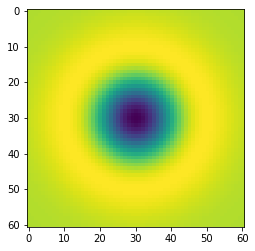

In [5]:
############################
##EX1
#############################
import numpy as np
import matplotlib.pyplot as plt


sigma = 10
hw = 3*sigma
x,y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma **2)*(x**2/sigma**2+y**2/sigma**2-2)*np.exp(-(x**2+y**2)/(2*sigma**2))
plt.imshow(log)

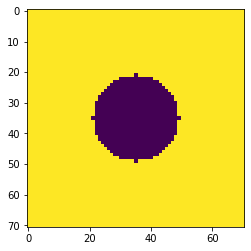

In [7]:
############################
##EX2
#############################
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

w,h = 71,71
hw = w//2
hh = h//2
f = np.ones((h,w),dtype = np.float32)*255
x,y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))
r = w//5
f *= x**2 + y**2 >r**2
plt.imshow(f)

(35, 35, 5)
10


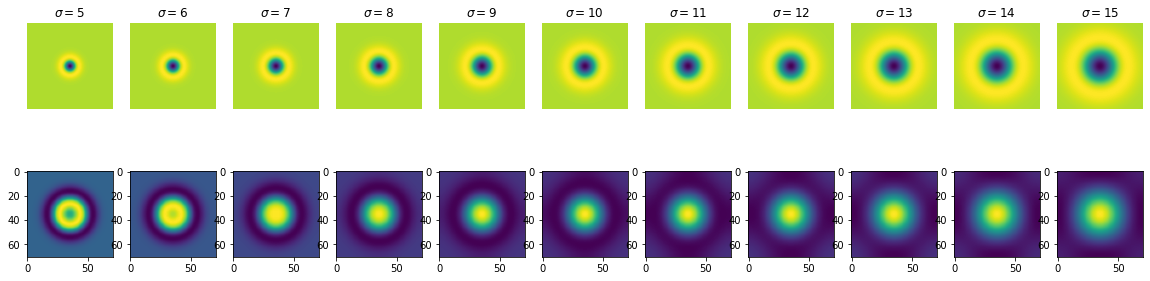

In [14]:
s = 11
fig,ax = plt.subplots(2,s,figsize = (20,5))
scale_space = np.empty((h,w,s),dtype = np.float32)
sigmas = np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    x,y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma **2)*(x**2/sigma**2+y**2/sigma**2-2)*np.exp(-(x**2+y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i]= f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title('$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)

indices = np.unravel_index(np.argmax(scale_space,axis =None),scale_space.shape)
print(indices)    
print(sigmas[indices[2]])

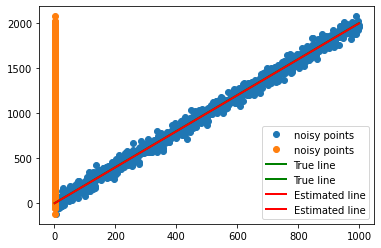

In [46]:
#Fitting
#Ex4
########################
#least square line fitting


m = 2 # Line equa t ion : y = m*x + c . m i s the s l o p e . c i s the i n t e r c e p t .
c = 1


x = np.arange (1 , 1000 , 1)
sigma = 50
np.random.seed(45)
noise = sigma * np.random.randn(len(x))
o = np . zeros ( x . shape )
# o [=1] = 20
y = m*x + c + noise + o
n = len(x)
x = np.concatenate([x.reshape(n,1),np.ones((n,1))],axis = 1)
B = np.linalg.pinv(x.T@ x) @ x.T @ y
mstar = B[0]
cstar = B[1]
plt.plot(x,y,'o',label = 'noisy points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color = 'g',linewidth = 2,label = 'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color = 'r',linewidth = 2,label = 'Estimated line')
plt.legend()


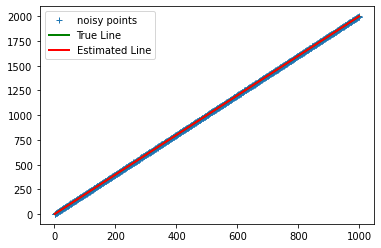

In [48]:
#Ex5
########################
#least square line fitting
m = 2 # Line equation : y = m*x + c . m i s the s l o p e . c i s the i n t e r c e p t .
c = 1
x = np.arange (1 , 1000 , 1)
sigma = 2
np.random.seed(45)
noise = sigma * np.random.randn(len(x))
o = np.zeros(x.shape)

y = m*x +c +noise +0


n = len(x)
u11 = np.sum((x-np.mean(x))**2)
u12=np.sum((x-np.mean(x))*(y-np.mean(y)))
u21=u12
u22=np.sum((y-np.mean(y))**2)
u = np.array([[u11,u12],[u21,u22]])
w,v = np.linalg.eig(u)
ev_corresponding_to_smalest_ev = v[:,np.argmin(w)]
a =ev_corresponding_to_smalest_ev[0]
b = ev_corresponding_to_smalest_ev[1]
d = a*np.mean(x)+b*np.mean(y)
mstar=-a/b
cstar=d/b
plt.plot(x,y,'+', label='noisy points')
plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label="True Line")
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + c], color = 'r', linewidth = 2, label="Estimated Line")
plt.legend()
